In [1]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from evclust.utils import plotting
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from evclust.utils import display_results_evidential, display_results_fuzzy_partition
from evclust.datasets import load_toys3c2d_2

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances: 600; Features: 2; Clusters: 2    3
dtype: int64
Instances 600 - Features 2 - Class 3
          0         1
0  0.297720  1.884057
1  0.582032  3.336933
2  0.414665  3.918128
3  0.649395  2.436345
4  0.347310  2.367457


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


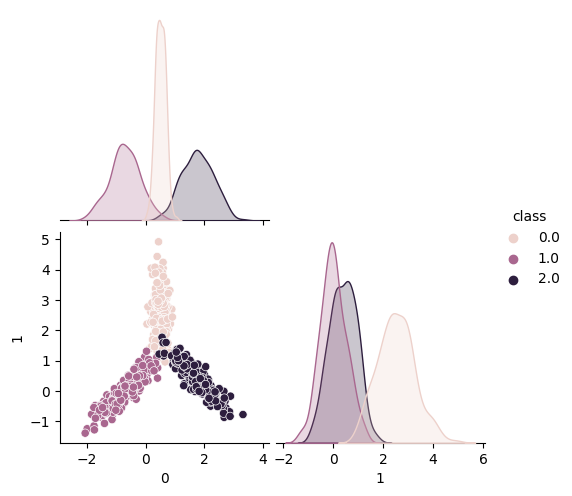

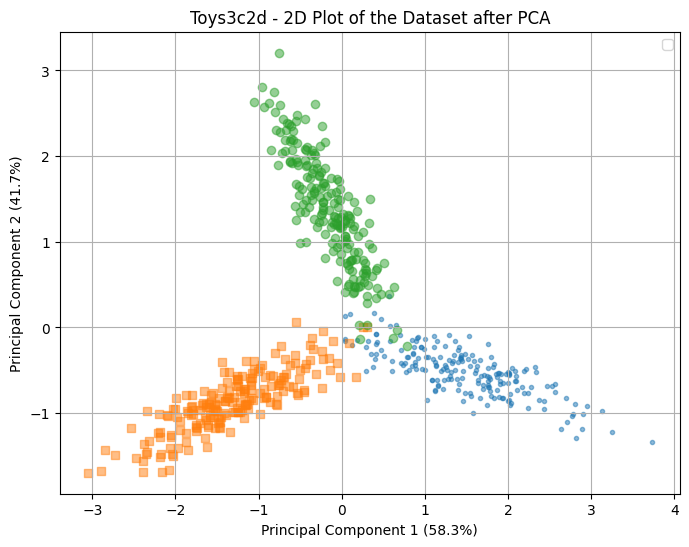

In [2]:
# fetch dataset 
df = load_toys3c2d_2()

# data (as pandas dataframes) 
X = df.iloc[:, :-1]
y = pd.DataFrame(df.iloc[:, -1])
c = 3

print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")
plotting(X, y, "Toys3c2d", matrix_plot=True)

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

# Normalization
scaler = MinMaxScaler((0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

# ECM

In [3]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None")
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [3.8395098530481895, 3.8396736418260837, 3.839783778368317, 3.8399098842352286, 3.8399313651928333, 3.839940982320264, 3.840023407739013, 3.8400752395563775, 3.8402713066445737, 3.8403054228728366]
ARI values: [0.9259715290996613, 0.9259715290996613, 0.9259715290996613, 0.9259715290996613, 0.9212886949681863, 0.9212886949681863, 0.9259715290996613, 0.9259715290996613, 0.9212886949681863, 0.9212886949681863]
NS values: [1.398340250898748, 1.4325518110902766, 1.4232099247217218, 1.3924627057998737, 1.3698697147085497, 1.436780922671006, 1.3642659722872017, 1.4218872834720255, 1.3718828536344092, 1.3979363176322401]
NMI values: [0.9048866033769425, 0.9048866033769423, 0.9048866033769423, 0.9048866033769425, 0.8954328350262712, 0.8954328350262714, 0.9048866033769423, 0.9048866033769423, 0.8954328350262712, 0.8954328350262715]


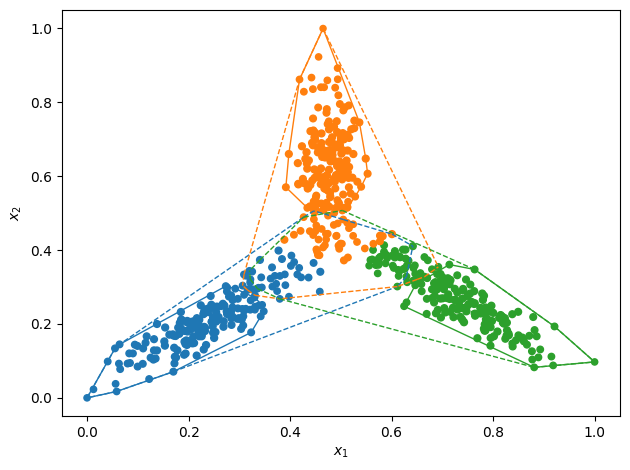

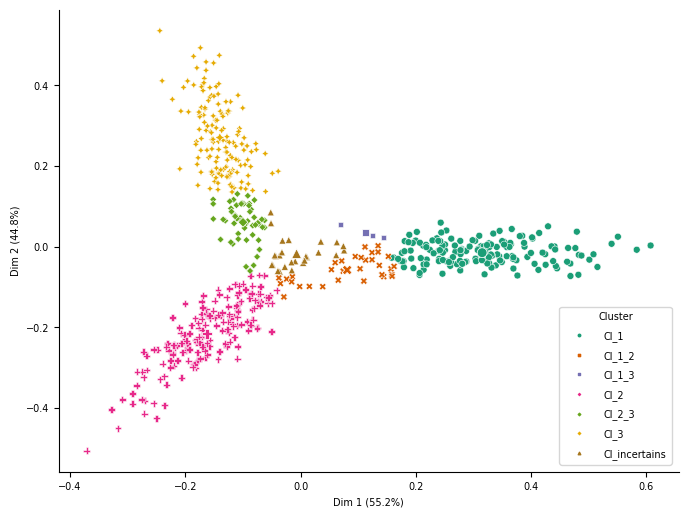

In [4]:

display_results_evidential(X, ecm_models, numeric_labels)

# WECM

In [5]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None")
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.38560359012013, 0.40853775251702695, 0.4089431315519507, 0.40913533631375665, 0.42165866689340187, 0.42195549870944393, 0.42208982184252297, 0.43911464500718733, 0.45161514389923735, 0.46749741213549867]
ARI values: [0.4892718404807447, 0.509995075124788, 0.5089739345837162, 0.5215986920931376, 0.5429084295469259, 0.5404085017843429, 0.5459872470722389, 0.5424881319221067, 0.21755697335227725, 0.48458487140435563]
NS values: [1.816570700534764, 1.7114542542859237, 1.5656343385626166, 1.532501526842759, 2.1069349331709475, 1.9915033518929826, 2.1349678545127033, 1.553559327539351, 1.6309390113696318, 1.5494848031967638]
NMI values: [0.5123341825642664, 0.5390820365353184, 0.5269914865707274, 0.5398539626986126, 0.5300996688812871, 0.5283920981848895, 0.532796914218547, 0.5519065192390337, 0.2883023723088649, 0.49812588551717535]


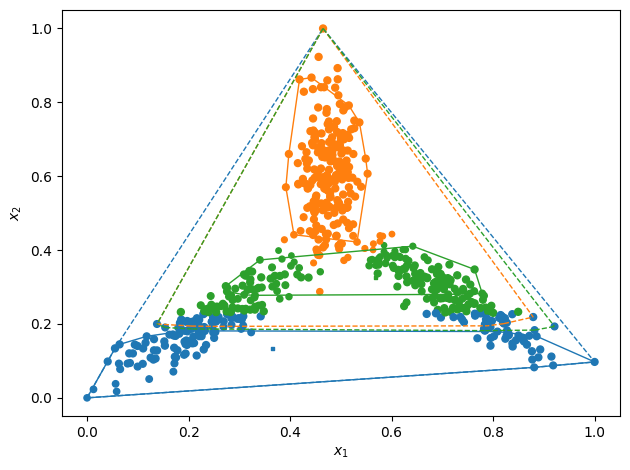

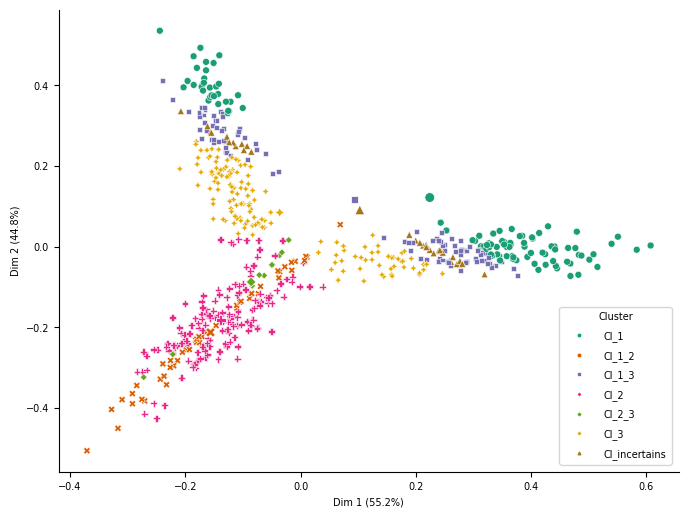

In [6]:
display_results_evidential(X, wecm_models, numeric_labels)

# Weighted FCM - Keller et al. 2000

In [7]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-6, init="None")
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [0.7973708472514738, 0.7973708512037206, 0.7973712821581083, 0.79737159184302, 0.7973715954826596, 0.7973716321082641, 0.7973716369145294, 0.7973719068660143, 0.7973720149346906, 0.7973720223866091]
ARI values: [0.49297144692597383, 0.49297144692597383, 0.49594089363471955, 0.49594089363471955, 0.49594089363471955, 0.49297144692597383, 0.49297144692597383, 0.49297144692597383, 0.49297144692597383, 0.49594089363471955]
NMI values: [0.5096928928126052, 0.5096928928126052, 0.5116444138504521, 0.5116444138504521, 0.5116444138504521, 0.5096928928126051, 0.5096928928126052, 0.5096928928126051, 0.5096928928126052, 0.5116444138504521]


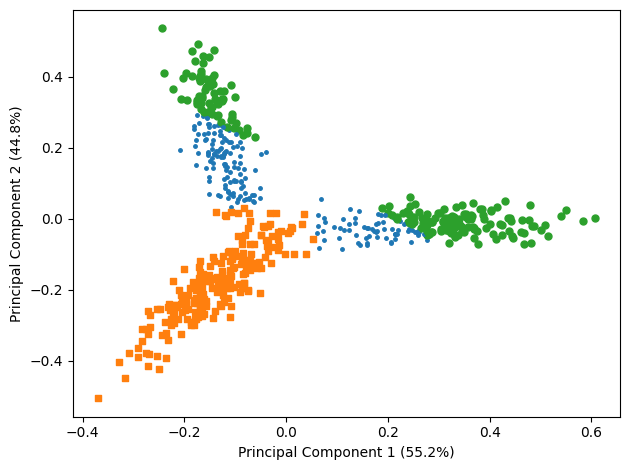

In [8]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# WFCM Wang2004

In [9]:
# %%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=3.4, verbose=True, init="None")
    wang_models = np.append(wang_models, model)

Dataset includes 600 instances, and 2 features
Initial centers: [[0.13795113 0.17901647]
 [0.49666825 0.49648451]
 [0.48699704 0.44701143]]
Initial weights: [0.5 0.5]
[1, 0.07429564771787106]]
Final initial weights: [0.50318633 0.50223404]
[1, 3.1241419392344305]
[2, 2.5530942701910186]
[3, 1.906027844414558]
[4, 1.7208408346818111]
[5, 1.695181192726975]
[6, 1.6915820157202477]
[7, 1.6910003241483307]
Dataset includes 600 instances, and 2 features
Initial centers: [[0.32206954 0.1987895 ]
 [0.07035788 0.17173605]
 [0.5275673  0.31792018]]
Initial weights: [0.5 0.5]
[1, 0.07429564771787106]]
Final initial weights: [0.50318633 0.50223404]
[1, 4.036621540978691]
[2, 3.6109421797146544]
[3, 3.270264462803963]
[4, 2.698964283195525]
[5, 2.004323477142787]
[6, 1.7347744878111686]
[7, 1.696043274308039]
[8, 1.6915353107892146]
[9, 1.69096371172646]


J values: [1.6910003241483307, 1.69096371172646]
ARI values: [0.9308032274151322, 0.9114092001489524]
NMI values: [0.9011951334146393, 0.8812725419032443]


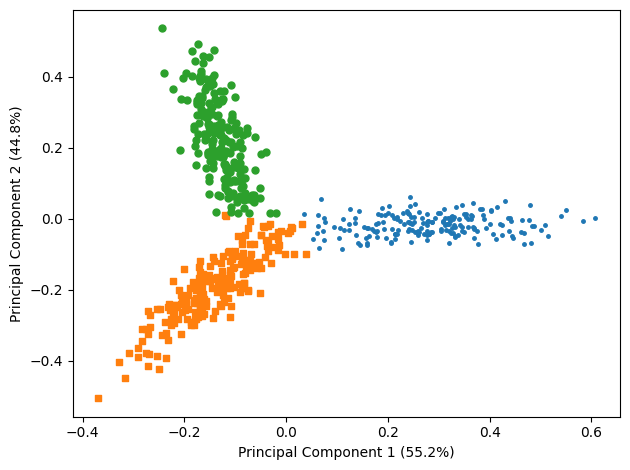

In [10]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [11]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, init="None")
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])

J values: [9.220414260805885, 9.220502720209305, 9.220506617239188, 9.220565025782124, 9.220585520455785, 9.220633460635327, 9.22066462810735, 9.220718580820225, 9.220800987849069, 9.2208521188367]
ARI values: [0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652]
NMI values: [0.8740526835751569, 0.8740526835751569, 0.8740526835751566, 0.8740526835751569, 0.8740526835751569, 0.8740526835751569, 0.8740526835751569, 0.8740526835751566, 0.8740526835751566, 0.8740526835751566]


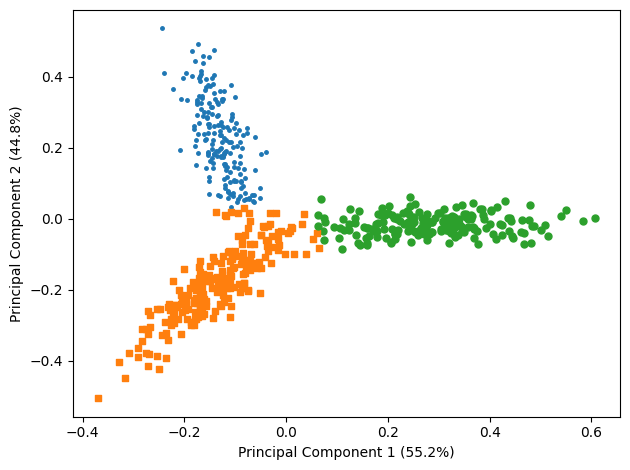

In [12]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [13]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, init="None")
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])

J values: [1.1124804523258573, 1.143242618217446, 1.1465337413487404, 1.1474658533772715, 1.1477734700761721, 1.1479428475930238, 1.147952079317773, 1.148151183907797, 1.14827940366646, 1.149032520154323]
ARI values: [0.7447697297095401, 0.7773895016696205, 0.782075192422475, 0.7775044196843535, 0.7728098742076339, 0.7728098742076339, 0.7728098742076339, 0.7728098742076339, 0.7728098742076339, 0.7637393742274907]
NMI values: [0.7268307023861463, 0.7764012428306957, 0.7799278087357683, 0.7766106388296381, 0.7730785563644361, 0.7730785563644361, 0.7730785563644361, 0.7730785563644361, 0.7730785563644361, 0.7666075978682726]


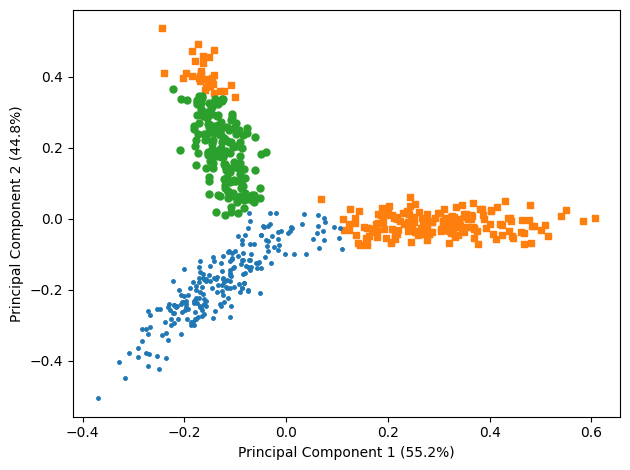

In [14]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [15]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, init="None")
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [1.6221513265223946, 1.6222769115349696, 1.6223438631787477, 1.6242322048866988, 1.6257272906884475, 1.625746153187212, 1.6258364942123447, 1.626037584128432, 1.626224168685801, 1.6262809512140892]
ARI values: [0.8913531206089566, 0.8865485697498875, 0.8865485697498875, 0.8913531206089566, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652]
NMI values: [0.8693681479927752, 0.8651063365463776, 0.8651063365463776, 0.8693681479927752, 0.8740526835751569, 0.8740526835751566, 0.8740526835751566, 0.8740526835751566, 0.8740526835751566, 0.8740526835751566]


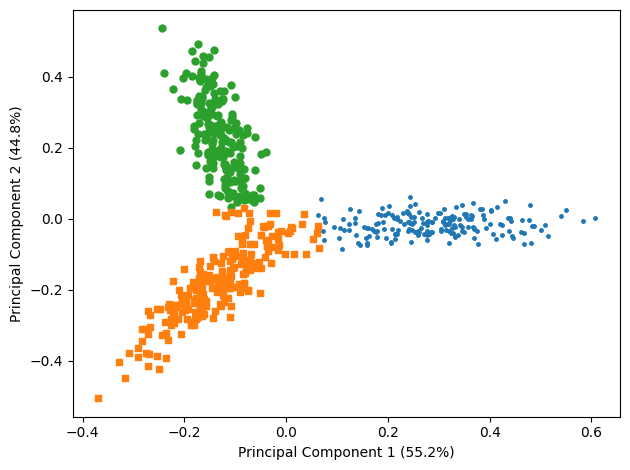

In [16]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [17]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6, init="None")
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [32.787634913474676, 32.787635021424904, 32.78763510759749, 32.787635217478766, 32.787635248297164, 32.78763929360557, 32.78763933266438, 32.78763948320871, 32.78763953910398, 32.78763961816874]
ARI values: [0.8431815692528805, 0.8431815692528805, 0.8431815692528805, 0.8431815692528805, 0.8431815692528805, 0.8431815692528805, 0.8431815692528805, 0.8431815692528805, 0.8431815692528805, 0.8431815692528805]
NMI values: [0.8275011662778119, 0.827501166277812, 0.8275011662778119, 0.827501166277812, 0.827501166277812, 0.8275011662778119, 0.8275011662778119, 0.8275011662778119, 0.8275011662778119, 0.8275011662778119]


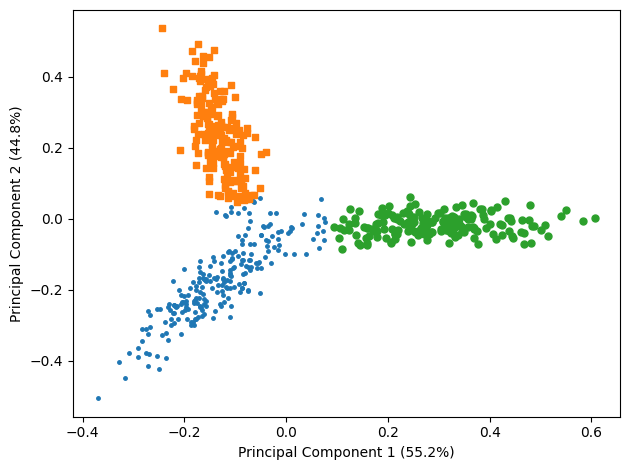

In [18]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)